In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# from geneticalgorithm import geneticalgorithm as ga
from sklearn.linear_model import LinearRegression
import itertools
import random

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## reading dataset

### Austin

In [ ]:
# Reading dataset
Austin = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Meimand/Working Papers/Conferences/CRC 2022/Building Model/Simulation/" + 'Austin' + ".csv")
Austin = Austin.drop(Austin.index[0:192],axis = 0)
Austin = Austin.reset_index()
Austin = Austin.drop("index", axis = 1)

# Adding dates to the dataset
delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
Austin["Month"] = None
Austin["Day"] = None
Austin["Hour"] = None
Austin["Minutes"] = None

for i in range(Austin.shape[0]):
  Austin["Month"][i] = int(re.split(regexPattern,Austin["Date/Time"][i])[1])
  Austin["Day"][i] = int(re.split(regexPattern,Austin["Date/Time"][i])[2])
  Austin["Hour"][i] = int(re.split(regexPattern,Austin["Date/Time"][i])[4])
  Austin["Minutes"][i] = int(re.split(regexPattern,Austin["Date/Time"][i])[5])

# Adding next temperature to the model
Predicted_temperature = Austin["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][1:]
Predicted_temperature = Predicted_temperature.reset_index()
Predicted_temperature = Predicted_temperature.drop("index", axis = 1)
Austin = Austin.drop(Austin.shape[0] - 1,axis = 0)
Austin["Next Temperature"] = Predicted_temperature

# Adding previous temperature to the model
Previous_Temperature = Austin["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][0:-1]
Austin = Austin.drop(0,axis = 0)
Austin = Austin.reset_index()
Austin = Austin.drop("index", axis = 1)
Austin["Previous Temperature"] = Previous_Temperature

# data cleaning and preparing
Austin = Austin.drop(["ATTIC_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)","ATTIC_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)",
             "ATTIC_UNIT1:Zone Air Relative Humidity [%](TimeStep)","ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)",
              "ATTIC_UNIT1:Zone Mean Air Temperature [C](TimeStep)","ATTIC_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Heating Energy [J](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Cooling Energy [J](TimeStep)"], axis = 1)

Austin["LIVING_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)"] *= 2.77778e-7
Austin["LIVING_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)"] *= 2.77778e-7
Austin["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep) "] *= 2.77778e-7

Austin = Austin[(Austin["Month"] >=6) & (Austin["Month"] <= 9)]

### Albuquerque

In [ ]:
Albuquerque = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Ebrahimi Meimand/Working Papers/Conferences/CRC 2022/Building Model/temp/" + 'Albuquerque' + ".csv")
Albuquerque = Albuquerque.drop(Albuquerque.index[0:192],axis = 0)
Albuquerque = Albuquerque.reset_index()
Albuquerque = Albuquerque.drop("index", axis = 1)

delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
Albuquerque["Month"] = None
Albuquerque["Day"] = None
Albuquerque["Hour"] = None
Albuquerque["Minutes"] = None

for i in range(Albuquerque.shape[0]):
  Albuquerque["Month"][i] = int(re.split(regexPattern,Albuquerque["Date/Time"][i])[1])
  Albuquerque["Day"][i] = int(re.split(regexPattern,Albuquerque["Date/Time"][i])[2])
  Albuquerque["Hour"][i] = int(re.split(regexPattern,Albuquerque["Date/Time"][i])[4])
  Albuquerque["Minutes"][i] = int(re.split(regexPattern,Albuquerque["Date/Time"][i])[5])

# Adding next temperature to the model
Predicted_temperature = Albuquerque["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][1:]
Predicted_temperature = Predicted_temperature.reset_index()
Predicted_temperature = Predicted_temperature.drop("index", axis = 1)
Albuquerque = Albuquerque.drop(Albuquerque.shape[0] - 1,axis = 0)
Albuquerque["Next Temperature"] = Predicted_temperature

# Adding previous temperature to the model
Previous_Temperature = Albuquerque["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][0:-1]
Albuquerque = Albuquerque.drop(0,axis = 0)
Albuquerque = Albuquerque.reset_index()
Albuquerque = Albuquerque.drop("index", axis = 1)
Albuquerque["Previous Temperature"] = Previous_Temperature


Albuquerque = Albuquerque.drop(["ATTIC_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)","ATTIC_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)",
             "ATTIC_UNIT1:Zone Air Relative Humidity [%](TimeStep)","ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)",
              "ATTIC_UNIT1:Zone Mean Air Temperature [C](TimeStep)","ATTIC_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Heating Energy [J](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Cooling Energy [J](TimeStep)"], axis = 1)

Albuquerque["LIVING_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)"] *= 2.77778e-7
Albuquerque["LIVING_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)"] *= 2.77778e-7
Albuquerque["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep) "] *= 2.77778e-7

Albuquerque = Albuquerque[(Albuquerque["Month"] >=7) & (Albuquerque["Month"] <= 8)]
Albuquerque = Albuquerque.reset_index()
Albuquerque = Albuquerque.drop("index", axis = 1)

### Houston

In [ ]:
Houston = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Ebrahimi Meimand/Working Papers/Conferences/CRC 2022/Building Model/temp/" + 'Houston' + ".csv")
Houston = Houston.drop(Houston.index[0:192],axis = 0)
Houston = Houston.reset_index()
Houston = Houston.drop("index", axis = 1)

delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
Houston["Month"] = None
Houston["Day"] = None
Houston["Hour"] = None
Houston["Minutes"] = None

for i in range(Houston.shape[0]):
  Houston["Month"][i] = int(re.split(regexPattern,Houston["Date/Time"][i])[1])
  Houston["Day"][i] = int(re.split(regexPattern,Houston["Date/Time"][i])[2])
  Houston["Hour"][i] = int(re.split(regexPattern,Houston["Date/Time"][i])[4])
  Houston["Minutes"][i] = int(re.split(regexPattern,Houston["Date/Time"][i])[5])

# Adding next temperature to the model
Predicted_temperature = Houston["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][1:]
Predicted_temperature = Predicted_temperature.reset_index()
Predicted_temperature = Predicted_temperature.drop("index", axis = 1)
Houston = Houston.drop(Houston.shape[0] - 1,axis = 0)
Houston["Next Temperature"] = Predicted_temperature

# Adding previous temperature to the model
Previous_Temperature = Houston["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][0:-1]
Houston = Houston.drop(0,axis = 0)
Houston = Houston.reset_index()
Houston = Houston.drop("index", axis = 1)
Houston["Previous Temperature"] = Previous_Temperature


Houston = Houston.drop(["ATTIC_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)","ATTIC_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)",
             "ATTIC_UNIT1:Zone Air Relative Humidity [%](TimeStep)","ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)",
              "ATTIC_UNIT1:Zone Mean Air Temperature [C](TimeStep)","ATTIC_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Heating Energy [J](TimeStep)",
              "ZONEDIRECTAIR_UNIT1 ADU:Zone Air Terminal Sensible Cooling Energy [J](TimeStep)"], axis = 1)

Houston["LIVING_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)"] *= 2.77778e-7
Houston["LIVING_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)"] *= 2.77778e-7
Houston["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep) "] *= 2.77778e-7

Houston = Houston[(Houston["Month"] >=5) & (Houston["Month"] <= 9)]
Houston = Houston.reset_index()
Houston = Houston.drop("index", axis = 1)

In [ ]:
Dataset = Austin
Dataset = Dataset.merge(Albuquerque, how = 'outer')
Dataset = Dataset.merge(Houston, how = 'outer')

## Thermal comfort dataset

In [ ]:
Profiles_Dataset = pd.DataFrame()
Profiles_Dataset["index"] = range(0,1201)

Thermal_Preferences = [23.67,24.69,22.76,21.49,20.05,23.99,22.09,23.02,20.82,25.55,22.22,27.31,20.26,21.74,25.16]

In [ ]:
for k in range(1,16):
  temp = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Meimand/Working Papers/++HVAC controller integrated with Personal Thermal Comfort and Real Time Price/Thermal Comfort/" + str(k) + ".csv", header = None)
  
  temp = temp.loc[0] # Changing to a column
  temp = pd.DataFrame(temp) # changing to a dataframe
  temp = temp.rename(columns={0: str("Probability" + str(k))}) # renaming the column

  index = temp[temp[str("Probability" + str(k))] == 1].index[0] # getting where is the maximum value

  # Adding probabilities
  temp[str("Temperature" + str(k))] = None
  temp[str("Temperature" + str(k))][index] = Thermal_Preferences[k-1] # Thermal Preference

  for i in range(index - 1,-1,-1):
    temp[str("Temperature" + str(k))][i] = temp[str("Temperature" + str(k))][i + 1] - 0.01

  for i in range(index + 1, temp.shape[0]):
    temp[str("Temperature" + str(k))][i] = temp[str("Temperature" + str(k))][i - 1] + 0.01

  temp[str("Temperature" + str(k))] = temp[str("Temperature" + str(k))].astype(float).round(2)
  temp["index"] = temp.index

  Profiles_Dataset = pd.merge(Profiles_Dataset, temp, on = "index")

In [ ]:
Profiles_Dataset["Temperature14"][Profiles_Dataset["Probability14"] == 1]

374    21.74
Name: Temperature14, dtype: float64

In [ ]:
Profiles_Dataset["Probability1"].round(1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1196    0.0
1197    0.0
1198    0.0
1199    0.0
1200    0.0
Name: Probability1, Length: 1201, dtype: float64

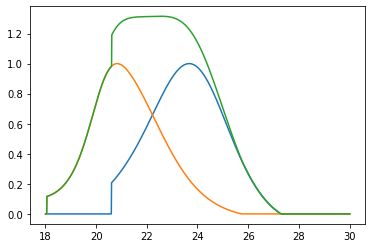

In [ ]:
plt.plot(Profiles_Dataset["Temperature1"], Profiles_Dataset["Probability1"])
plt.plot(Profiles_Dataset["Temperature10"], Profiles_Dataset["Probability9"])
# plt.plot(Profiles_Dataset["Temperature10"], Profiles_Dataset["Probability11"])
plt.plot(Profiles_Dataset["Temperature10"], Profiles_Dataset["Probability1"] + Profiles_Dataset["Probability9"]) # + Profiles_Dataset["Probability11"])

In [ ]:
minTempConstraint = Profiles_Dataset["Temperature1"][Profiles_Dataset["Probability1"].round(2) == 0.8].min()

22.63

## Regression model

### For cooling

In [ ]:
Dataset.to_csv("BuildingBlackBoxModleDataset.csv")

In [ ]:
Austin.shape

(11712, 21)

In [ ]:
X = Austin[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
             'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','Environment:Site Wind Speed [m/s](TimeStep)',
             'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)','LIVING_UNIT1:Zone People Occupant Count [](TimeStep)']]
Y = Austin["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep) "]
Y = Y.reset_index()
Y = Y["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep) "]
reg_cooling = LinearRegression().fit(X,Y)
reg_cooling.score(X, Y)

0.7908930329475186

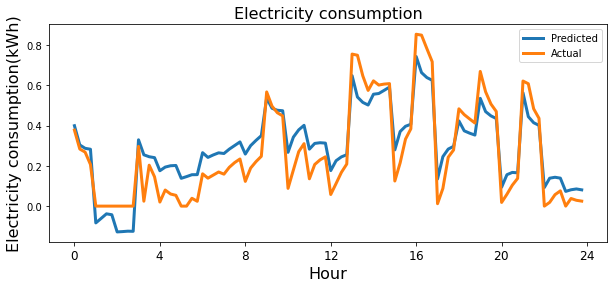

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(reg_cooling.predict(X)[0:96],linewidth = 3)
ax.plot(Y[0:96],linewidth = 3)

xticks = range(0,104,16)
xticks_1 = range(0,25,4)
ax.set_xticks(xticks)
ax.set_xticklabels(["$%.0f$" % x for x in xticks_1], fontsize=12);

ax.set_title("Electricity consumption", size = 16)
ax.set_xlabel("Hour", size = 16)
ax.set_ylabel("Electricity consumption(kWh)", size = 16)
ax.legend(["Predicted","Actual"])
plt.savefig("electricityPrice", dpi = 1200)

In [ ]:
reg_cooling.coef_

array([-1.08967252e-01,  3.61046287e-02,  3.07771275e-02,  5.50073810e-03,
       -3.05678190e-05,  1.34778312e-02])

### For temperature

In [ ]:
X = Austin[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
             'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']]

Y = Austin[['LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)']]
Y = Y.reset_index()
Y = Y[['LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)']]
reg_temperature = LinearRegression().fit(X, Y)
reg_temperature.score(X, Y)

0.9272744118691385

In [ ]:
reg_temperature.coef_

array([[0.55022846, 0.38655871, 0.04891963]])

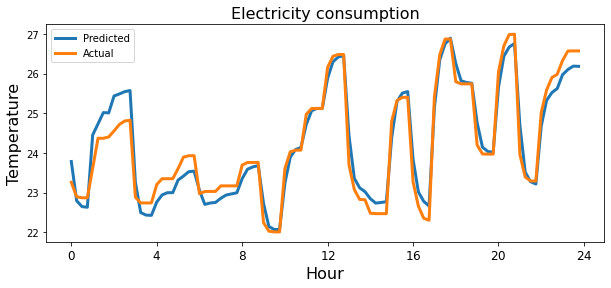

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(reg_temperature.predict(X)[0:96],linewidth = 3)
ax.plot(Y[0:96],linewidth = 3)

xticks = range(0,104,16)
xticks_1 = range(0,25,4)
ax.set_xticks(xticks)
ax.set_xticklabels(["$%.0f$" % x for x in xticks_1], fontsize=12);

ax.set_title("Temperature Model", size = 16)
ax.set_xlabel("Hour", size = 16)
ax.set_ylabel("Temperature", size = 16)
ax.legend(["Predicted","Actual"])
plt.savefig("Temperature", dpi = 1200)

## Genetic Algorithm

In [ ]:
# Number of the setpoints we want to optimize.
num_variables = 6   # 6 for checking the next 1.5 hours in future

In [ ]:
August = Austin[Austin["Month"] == 8]
August = August.reset_index()
August = August.drop("index", axis=1)

In [ ]:
X = August[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
             'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','Environment:Site Wind Speed [m/s](TimeStep)',
             'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)','LIVING_UNIT1:Zone People Occupant Count [](TimeStep)']]

In [ ]:
data = X[0:num_variables]

In [ ]:
Initial_temperature = 23
# About the previous temperature, I mean the previous temperature that I want to use it for prediction
def energy_function(x):
  data['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)'][0:num_variables] = x # setting all the setpoints

  # calculating all the next temperatures based on the x array of setpoint
  data["Previous Temperature"][0] = Initial_temperature
  
  for i in range(0,num_variables-1):
    Next = reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[i][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']])))
    data["Previous Temperature"][i+1] = Next
  Last = reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[num_variables-1][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']]))) # the last calculation
  
  # Calculating temperature cost
  temperature_cost = 0
  for k in range(1, num_variables):
    if (data['Previous Temperature'][k] < 20):
      temperature_cost += abs(20 - data['Previous Temperature'][k]) 
    if (data['Previous Temperature'][k] > 24):
      temperature_cost += abs(24 - data['Previous Temperature'][k])
  if (Last < 20):
    temperature_cost += abs(20 - Last) 
  if (Last > 24):
    temperature_cost += abs(24 - Last)


  return reg_cooling.predict(data[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
             'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','Environment:Site Wind Speed [m/s](TimeStep)',
             'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)','LIVING_UNIT1:Zone People Occupant Count [](TimeStep)']]).sum() + temperature_cost * 1000

varbound = np.array([[20,26]] * num_variables)

algorithm_param = {'max_num_iteration': 50,
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=energy_function,\
            dimension = num_variables,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

## MPC

### Initilization

In [ ]:
# Number of the setpoints we want to optimize.
num_variables = 6   # 6 for checking the next 1.5 hours in future

In [ ]:
August = Austin[Austin["Month"] == 8]
August = August.reset_index()
August = August.drop("index", axis=1)

In [ ]:
X = August[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
             'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','Environment:Site Wind Speed [m/s](TimeStep)',
             'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)','LIVING_UNIT1:Zone People Occupant Count [](TimeStep)']]

### Adding comfort profiles

In [ ]:
"X_" + str(5) + ".csv"

'X_5.csv'

In [ ]:
# Preparing dataset for two agents
Nagent = 1
Agents = [2]#random.sample(range(1,16), Nagent)

Agg_vote = pd.DataFrame()
Agg_vote["Temperature"]= np.arange(20,30,0.1)

Agg_vote[str("Vote" + str(Agents[0]))] = None
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[0] - 1]
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote[str("Vote" + str(Agents[0]))].abs()

Agg_vote["Temperature"] = Agg_vote["Temperature"].round(1)

Agg_vote["aggregate"] = Agg_vote[str("Vote" + str(Agents[0]))]

Agg_vote

In [ ]:
# Preparing dataset for two agents
Nagent = 2
Agents = random.sample(range(1,16), Nagent)

Agg_vote = pd.DataFrame()
Agg_vote["Temperature"]= np.arange(20,30,0.1)

Agg_vote[str("Vote" + str(Agents[0]))] = None
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[0] - 1]
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote[str("Vote" + str(Agents[0]))].abs()


Agg_vote[str("Vote" + str(Agents[1]))] = None
Agg_vote[str("Vote" + str(Agents[1]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[1] - 1]
Agg_vote[str("Vote" + str(Agents[1]))] = Agg_vote[str("Vote" + str(Agents[1]))].abs()

Agg_vote["aggregate"] = Agg_vote[str("Vote" + str(Agents[0]))] + Agg_vote[str("Vote" + str(Agents[1]))]

Agg_vote["Temperature"] = Agg_vote["Temperature"].round(1)

Agg_vote

In [ ]:
Nagent = 4
Agents = random.sample(range(1,16), Nagent)
Agents = sorted(Agents)

Agg_vote = pd.DataFrame()
Agg_vote["Temperature"]= np.arange(20,30,0.1)

Agg_vote[str("Vote" + str(Agents[0]))] = None
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[0] - 1]
Agg_vote[str("Vote" + str(Agents[0]))] = Agg_vote[str("Vote" + str(Agents[0]))].abs()

Agg_vote[str("Vote" + str(Agents[1]))] = None
Agg_vote[str("Vote" + str(Agents[1]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[1] - 1]
Agg_vote[str("Vote" + str(Agents[1]))] = Agg_vote[str("Vote" + str(Agents[1]))].abs()

Agg_vote[str("Vote" + str(Agents[2]))] = None
Agg_vote[str("Vote" + str(Agents[2]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[2] - 1]
Agg_vote[str("Vote" + str(Agents[2]))] = Agg_vote[str("Vote" + str(Agents[2]))].abs()

Agg_vote[str("Vote" + str(Agents[3]))] = None
Agg_vote[str("Vote" + str(Agents[3]))] = Agg_vote["Temperature"] - Thermal_Preferences[Agents[3] - 1]
Agg_vote[str("Vote" + str(Agents[3]))] = Agg_vote[str("Vote" + str(Agents[3]))].abs()

Agg_vote["aggregate"] = Agg_vote[str("Vote" + str(Agents[0]))] + Agg_vote[str("Vote" + str(Agents[1]))] + Agg_vote[str("Vote" + str(Agents[2]))] + Agg_vote[str("Vote" + str(Agents[3]))]

Agg_vote["Temperature"] = Agg_vote["Temperature"].round(1)

Agg_vote

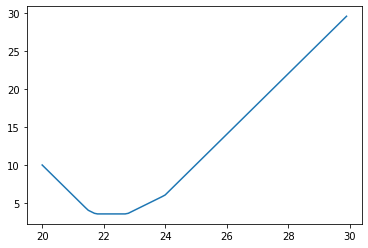

In [ ]:
plt.plot(Agg_vote["Temperature"], Agg_vote["aggregate"])

### running MPC

In [ ]:
Initial_temperature = 23
X["Previous Temperature"][0] = Initial_temperature

for timestep in range(0,96):
  data = X[timestep:timestep + num_variables]
  data = data.reset_index()
  data = data.drop("index", axis = 1)

  def energy_function(x):
    data['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)'][0:num_variables] = x # setting all the setpoints

    # calculating all the next temperatures based on the x array of setpoint    
    for i in range(0,num_variables-1):
      Next = reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[i][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
                'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']])))
      data["Previous Temperature"][i+1] = Next
    Last = reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[num_variables-1][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
                'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']]))) # the last calculation
    

    # # for a fixed range temperature 24
    # error = 0
    # for k in range(1, num_variables):
    #   if (data["Previous Temperature"][k] > 24):
    #     error += data["Previous Temperature"][k] - 24
    #   if (data["Previous Temperature"][k] < 20):
    #     error += 20 - data["Previous Temperature"][k]
    # if (Last[0][0] > 24):
    #   error += Last[0][0] - 24
    # if (Last[0][0] < 20):
    #   error += 20 - Last[0][0]

    # # Calculating temperature cost for two/four subjects
    error = 0
    for k in range(1, num_variables):
      error += float(Agg_vote["aggregate"][Agg_vote["Temperature"] ==  data["Previous Temperature"][k].round(1)])
    error += float(Agg_vote["aggregate"][Agg_vote["Temperature"] ==  Last[0][0].round(1)])

    return reg_cooling.predict(data[['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)','Environment:Site Wind Speed [m/s](TimeStep)',
              'Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep)','LIVING_UNIT1:Zone People Occupant Count [](TimeStep)']]).sum() + error * 10

  varbound = np.array([[20,30]] * num_variables)

  algorithm_param = {'max_num_iteration': 50,
                    'population_size':100,\
                    'mutation_probability':0.1,\
                    'elit_ratio': 0.01,\
                    'crossover_probability': 0.5,\
                    'parents_portion': 0.3,\
                    'crossover_type':'uniform',\
                    'max_iteration_without_improv':None}

  model=ga(function=energy_function,\
              dimension = num_variables,\
              variable_type='int',\
              variable_boundaries=varbound,\
              algorithm_parameters=algorithm_param)

  model.run()
  
  X["LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)"][timestep] = model.output_dict['variable'][0]
  
  X["Previous Temperature"][timestep + 1] = reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[0][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
                'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']])))
  
  print(reg_temperature.predict(pd.DataFrame.transpose(pd.DataFrame(data.loc[0][['LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)','Previous Temperature',
                'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)']]))))
  print(model.output_dict['variable'][0])
  print(timestep)

In [ ]:
X = X[0:96]

In [ ]:
X.to_csv("X_eta10_subjects_2.csv")

## Results and discussion

In [ ]:
X = pd.read_csv("X_eta10_subjects_EnergyOnly_30.csv")

### Charts

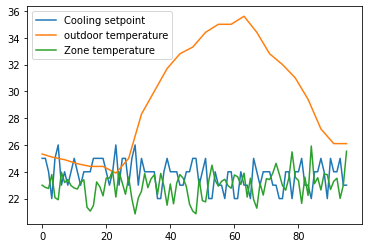

In [ ]:
plt.plot(X["LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)"])
plt.plot(X["Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)"])
plt.plot(X["Previous Temperature"])
plt.legend(["Cooling setpoint","outdoor temperature", "Zone temperature"])
# plt.savefig("1.png", dpi = 700)

### Preparing string for E+

In [ ]:
X = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Ebrahimi Meimand/Working Papers/++MPC for a building/Building Model/X_eta10_subjects_between_20_24.csv")

In [ ]:
X

,LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep),Previous Temperature,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Wind Speed [m/s](TimeStep),Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep),LIVING_UNIT1:Zone People Occupant Count [](TimeStep)
0,25.0,23.000000,25.325,1.125,0.0,3.0
1,25.0,22.830653,25.250,1.050,0.0,3.0
2,24.0,22.759366,25.175,0.975,0.0,3.0
3,22.0,23.790916,25.100,0.900,0.0,3.0
4,25.0,22.070698,25.050,0.825,0.0,3.0
...,...,...,...,...,...,...
91,24.0,23.287083,26.100,0.000,0.0,3.0
92,24.0,23.516194,26.100,0.525,0.0,3.0
93,25.0,22.011863,26.100,1.050,0.0,3.0
94,23.0,23.007988,26.100,1.575,0.0,3.0


In [ ]:
s = ''
for i in range(0,96):
  s = s + str(X["LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)"][i]) + ','

s

'27.0,25.0,25.0,25.0,27.0,26.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,25.0,25.0,26.0,25.0,26.0,26.0,25.0,26.0,26.0,25.0,25.0,26.0,26.0,24.0,26.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,26.0,24.0,26.0,25.0,24.0,25.0,25.0,26.0,25.0,25.0,24.0,24.0,25.0,23.0,24.0,25.0,24.0,25.0,25.0,24.0,25.0,24.0,25.0,25.0,25.0,25.0,23.0,25.0,24.0,25.0,22.0,24.0,25.0,25.0,25.0,26.0,24.0,25.0,24.0,25.0,25.0,24.0,24.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,24.0,25.0,26.0,26.0,24.0,25.0,25.0,'

### Comparing numbers

In [ ]:
temp_23 = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Meimand/Working Papers/++MPC for a building/Building Model/E+Validation/" + '23' + ".csv")

temp_23 = temp_23.drop(temp_23.index[0:192],axis = 0)
temp_23 = temp_23.reset_index()
temp_23 = temp_23.drop("index", axis = 1)

# Adding dates to the dataset
delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
temp_23["Month"] = None
temp_23["Day"] = None
temp_23["Hour"] = None
temp_23["Minutes"] = None

for i in range(temp_23.shape[0]):
  temp_23["Month"][i] = int(re.split(regexPattern,temp_23["Date/Time"][i])[1])
  temp_23["Day"][i] = int(re.split(regexPattern,temp_23["Date/Time"][i])[2])
  temp_23["Hour"][i] = int(re.split(regexPattern,temp_23["Date/Time"][i])[4])
  temp_23["Minutes"][i] = int(re.split(regexPattern,temp_23["Date/Time"][i])[5])

temp_23 = temp_23[temp_23["Day"] == 1]

temp_23["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"] *= 2.77778e-7

temp_23["time"] = temp_23.index

In [ ]:
temp_1 = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Meimand/Working Papers/++MPC for a building/Building Model/E+Validation/" + 'eta10_subject_2' + ".csv")

temp_1 = temp_1.drop(temp_1.index[0:192],axis = 0)
temp_1 = temp_1.reset_index()
temp_1 = temp_1.drop("index", axis = 1)

# Adding dates to the dataset
delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
temp_1["Month"] = None
temp_1["Day"] = None
temp_1["Hour"] = None
temp_1["Minutes"] = None

for i in range(temp_1.shape[0]):
  temp_1["Month"][i] = int(re.split(regexPattern,temp_1["Date/Time"][i])[1])
  temp_1["Day"][i] = int(re.split(regexPattern,temp_1["Date/Time"][i])[2])
  temp_1["Hour"][i] = int(re.split(regexPattern,temp_1["Date/Time"][i])[4])
  temp_1["Minutes"][i] = int(re.split(regexPattern,temp_1["Date/Time"][i])[5])

temp_1 = temp_1[temp_1["Day"] == 1]

temp_1["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"] *= 2.77778e-7

temp_1["time"] = temp_1.index

In [ ]:
temp_2 = pd.read_csv("/gdrive/Shareddrives/_Research Repository - Mostafa Meimand/Working Papers/++MPC for a building/Building Model/E+Validation/" + 'eta10_subject_14' + ".csv")

temp_2 = temp_2.drop(temp_2.index[0:192],axis = 0)
temp_2 = temp_2.reset_index()
temp_2 = temp_2.drop("index", axis = 1)

# Adding dates to the dataset
delimiters = " ", ":", "/"
regexPattern = '|'.join(map(re.escape, delimiters))
temp_2["Month"] = None
temp_2["Day"] = None
temp_2["Hour"] = None
temp_2["Minutes"] = None

for i in range(temp_2.shape[0]):
  temp_2["Month"][i] = int(re.split(regexPattern,temp_2["Date/Time"][i])[1])
  temp_2["Day"][i] = int(re.split(regexPattern,temp_2["Date/Time"][i])[2])
  temp_2["Hour"][i] = int(re.split(regexPattern,temp_2["Date/Time"][i])[4])
  temp_2["Minutes"][i] = int(re.split(regexPattern,temp_2["Date/Time"][i])[5])

temp_2 = temp_2[temp_2["Day"] == 1]

temp_2["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"] *= 2.77778e-7

temp_2["time"] = temp_2.index

#### Energy

In [ ]:
temp_23["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].sum()

34.52923672088839

#### Comfort Probability

In [ ]:
temp_23["Thermal Sensitivity"] = None
for t in range(96):
  p = np.round(temp_23["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][t],1)
  if p > 30:
    temp_23["Thermal Sensitivity"][t] = 0
  else:
    temp_23["Thermal Sensitivity"][t] = float(Profiles_Dataset["Probability14"][Profiles_Dataset["Temperature14"] == p])

temp_23["Thermal Sensitivity"].sum()/96

0.5127955208333334

In [ ]:
temp_1["Thermal Sensitivity"] = None
for t in range(96):
  p = np.round(temp_1["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][t],1)
  if p > 30:
    temp_1["Thermal Sensitivity"][t] = 0
  else:
    temp_1["Thermal Sensitivity"][t] = float(Profiles_Dataset["Probability2"][Profiles_Dataset["Temperature2"] == p])

temp_1["Thermal Sensitivity"].sum()/96

0.9673760416666677

In [ ]:
temp_2["Thermal Sensitivity"] = None
for t in range(96):
  p = np.round(temp_2["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"][t],1)
  if p > 30:
    temp_2["Thermal Sensitivity"][t] = 0
  else:
    temp_2["Thermal Sensitivity"][t] = float(Profiles_Dataset["Probability14"][Profiles_Dataset["Temperature14"] == p])

temp_2["Thermal Sensitivity"].sum()/96

0.733450583333333

In [ ]:
np.mean([86,16,73,19,61,80,91,19,91,16,78,91,70,10,85,19])

56.5625

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
       'LIVING_UNIT1:Zone People Occupant Count [](TimeStep)',
       'LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)',
       'ATTIC_UNIT1:Zone Mean Air Temperature [C](TimeStep)',
       'LIVING_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)',
       'LIVING_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)',
       'LIVING_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',
       'ATTIC_UNIT1:Zone Air System Sensible Heating Energy [J](TimeStep)',
       'ATTIC_UNIT1:Zone Air System Sensible Cooling Energy [J](TimeStep)',
       'ATTIC_UNIT1:Zone Thermostat Cooling Setpoint Temperature [C](TimeStep)',
       'HTGSETP_SCH:Schedule Value [](TimeStep)',
       'CLGSETP_SCH:Schedule Value [](TimeStep)',
       'MAIN ELECTRIC HEATING COIL_UNIT1:Heating Coil Heating Energy [J](Hourly)',
       'DX COOLING COIL_UNIT1:Cooling Coil Total Cooling Energy [J]

Text(0, 0.5, 'Outdoor temperature')

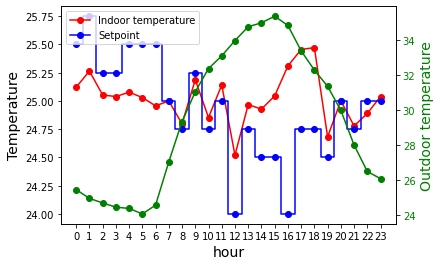

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(temp_1["LIVING_UNIT1:Zone Mean Air Temperature [C](TimeStep)"].groupby(np.arange(96)//4).mean(), color="red", marker="o")
ax.step(range(24),temp_1["CLGSETP_SCH:Schedule Value [](TimeStep)"].groupby(np.arange(96)//4).mean(),color="blue",marker="o", where = "mid")
ax.set_xlabel("hour",fontsize=14)
ax.set_ylabel("Temperature",fontsize=14)
ax.legend(["Indoor temperature","Setpoint"],loc='upper left')
ax.set_xticks(range(24))
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(temp_1["Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)"].groupby(np.arange(96)//4).mean(),color="green",marker="o")
ax2.tick_params(labelcolor="green")
ax2.set_ylabel("Outdoor temperature", fontsize = 14, color = "green")

# fig.savefig('1.jpg',format='jpeg',dpi=1000,bbox_inches='tight')

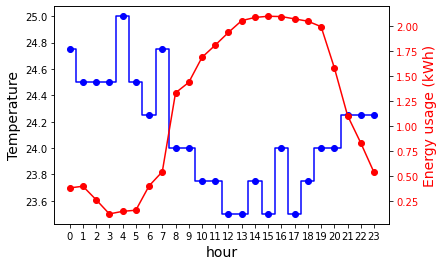

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.step(range(24),temp["CLGSETP_SCH:Schedule Value [](TimeStep)"].groupby(np.arange(96)//4).mean(),color="blue",marker="o", where = "mid")
ax.set_xlabel("hour",fontsize=14)
ax.set_ylabel("Temperature",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(temp["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].groupby(np.arange(96)//4).sum(), color="red", marker="o")
ax2.tick_params(labelcolor="red")
ax2.set_xticks(range(24))
ax2.set_ylabel("Energy usage (kWh)", fontsize = 14, color = "red")

fig.savefig('2.jpg',format='jpeg',dpi=1000,bbox_inches='tight')

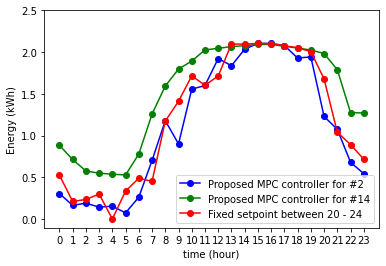

In [ ]:
plt.plot(temp_1["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].groupby(np.arange(96)//4).sum(),color="blue",marker="o")
plt.plot(temp_2["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].groupby(np.arange(96)//4).sum(),color="green",marker="o")
plt.plot(temp_23["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].groupby(np.arange(96)//4).sum(),color="red",marker="o")
plt.legend(["Proposed MPC controller for #2","Proposed MPC controller for #14", "Fixed setpoint between 20 - 24"])
plt.xticks(range(24))
plt.yticks(np.arange(0,3,0.5))
# plt.title("Comparing the energy usage of MPC between 22-24 and a fixed setpoint on 23")
plt.xlabel("time (hour)")
plt.ylabel("Energy (kWh)")
plt.savefig('2.jpg',format='jpeg',dpi=1500,bbox_inches='tight')

In [ ]:
temp_1["CENTRAL SYSTEM_UNIT1:Air System Electricity Energy [J](TimeStep)"].sum()

29.156186796275733

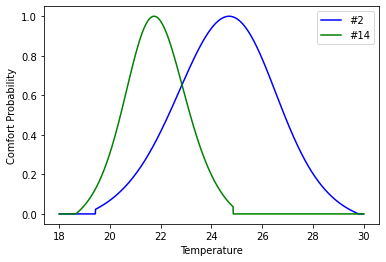

In [ ]:
plt.plot(Profiles_Dataset["Temperature2"], Profiles_Dataset["Probability2"], color = "blue")
plt.plot(Profiles_Dataset["Temperature14"], Profiles_Dataset["Probability14"], color = "green")
plt.legend(["#2", "#14"])
plt.xlabel("Temperature")
plt.ylabel("Comfort Probability")
plt.savefig('3.jpg',format='jpeg',dpi=1800,bbox_inches='tight')

In [ ]:
Profiles_Dataset[Profiles_Dataset["Probability10"] == 1]

,index,Probability1,Temperature1,Probability2,Temperature2,Probability3,Temperature3,Probability4,Temperature4,Probability5,Temperature5,Probability6,Temperature6,Probability7,Temperature7,Probability8,Temperature8,Probability9,Temperature9,Probability10,Temperature10,Probability11,Temperature11,Probability12,Temperature12,Probability13,Temperature13,Probability14,Temperature14,Probability15,Temperature15
754,754,0.43214,25.54,0.90506,25.54,0.16459,25.54,0.64682,25.54,0.0,25.54,0.59804,25.54,0.0,25.54,0.68045,25.54,0.008396,25.54,1.0,25.55,0.39664,25.54,0.92614,25.54,0.0,25.54,0.0,25.54,0.97638,25.54
755,755,0.42818,25.55,0.90286,25.55,0.16209,25.55,0.64542,25.55,0.0,25.55,0.59403,25.55,0.0,25.55,0.67834,25.55,0.007917,25.55,1.0,25.56,0.39444,25.55,0.92683,25.55,0.0,25.55,0.0,25.55,0.97508,25.55
